In [2]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import *
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout

%matplotlib inline
np.random.seed(1587)

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 23s 2us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')
x_train /= 255
x_test /= 255

In [6]:
number_of_classes = 10
y_train.shape

(60000,)

In [7]:
y_train = to_categorical(y_train,number_of_classes)
y_test = to_categorical(y_test,number_of_classes)

In [8]:
y_test.shape

(10000, 10)

In [11]:
#model
model = Sequential()
model.add(Dense(784, input_shape = (784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer = 'adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
classifier = model.fit(x_train, y_train, batch_size = 32, epochs = 10, verbose = True, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.1822 - acc: 0.9456 - val_loss: 0.0998 - val_acc: 0.9699
Epoch 2/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0787 - acc: 0.9769 - val_loss: 0.0785 - val_acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0535 - acc: 0.9850 - val_loss: 0.0694 - val_acc: 0.9779
Epoch 4/10
60000/60000 [==============================] - 42s 694us/step - loss: 0.0402 - acc: 0.9893 - val_loss: 0.0630 - val_acc: 0.9803
Epoch 5/10
60000/60000 [==============================] - 42s 700us/step - loss: 0.0312 - acc: 0.9921 - val_loss: 0.0625 - val_acc: 0.9810
Epoch 6/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0243 - acc: 0.9941 - val_loss: 0.0592 - val_acc: 0.9818
Epoch 7/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0194 - acc: 0.9959 - val_loss: 0.

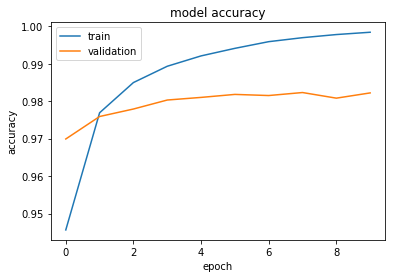

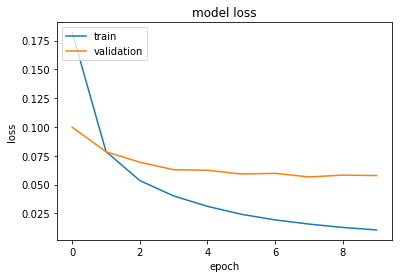

In [13]:
plt.plot(classifier.history['acc'])
plt.plot(classifier.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()